<ipython-input-2-0add7e5074a2>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')  # Forward fill missing values
<ipython-input-2-0add7e5074a2>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample(freq).mean()  # You can use different aggregation functions like sum(), mean(), etc.
<ipython-input-2-0add7e5074a2>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scaled_passengers'] = df_scaled


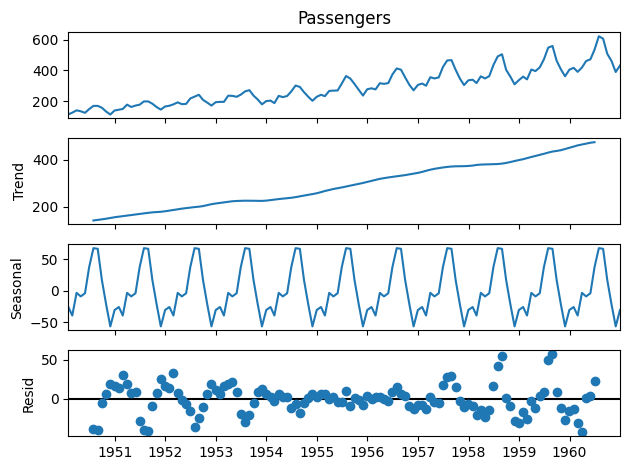

            Passengers  12_month_avg  lag_1  lag_12  scaled_passengers
Month                                                                 
1950-01-31       115.0    126.916667  118.0   112.0          -1.558251
1950-02-28       126.0    127.583333  115.0   118.0          -1.462634
1950-03-31       141.0    128.333333  126.0   132.0          -1.332248
1950-04-30       135.0    128.833333  141.0   129.0          -1.384402
1950-05-31       125.0    129.166667  135.0   121.0          -1.471327


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats

# Step 1: Load Time Series Data (Using the Airline Passengers dataset)
def load_data(file_path):
    """Load time series data from a CSV file"""
    df = pd.read_csv(file_path, parse_dates=True, index_col='Month')
    return df

# Step 2: Handle Missing Data
def handle_missing_data(df):
    """Fill missing values using forward fill or interpolate"""
    df_filled = df.fillna(method='ffill')  # Forward fill missing values
    return df_filled

# Step 3: Resample Time Series Data
def resample_data(df, freq='M'):
    """Resample the data at a different frequency (e.g., monthly, weekly)"""
    df_resampled = df.resample(freq).mean()  # You can use different aggregation functions like sum(), mean(), etc.
    return df_resampled

# Step 4: Remove Outliers Using Z-Score Method
def remove_outliers(df):
    """Detect and remove outliers using Z-Score method"""
    z_scores = np.abs(stats.zscore(df))
    df_no_outliers = df[(z_scores < 3).all(axis=1)]  # Remove rows where any value has a Z-score > 3
    return df_no_outliers

# Step 5: Feature Engineering (Rolling Mean, Lags, etc.)
def add_features(df):
    """Add additional features like rolling mean, lagged features"""
    # Adding a 12-month rolling mean feature
    df['12_month_avg'] = df['Passengers'].rolling(window=12).mean()

    # Creating lag features
    df['lag_1'] = df['Passengers'].shift(1)  # Lag of 1 month
    df['lag_12'] = df['Passengers'].shift(12)  # Lag of 12 months

    # Drop the NaN values created by rolling and shifting
    df = df.dropna()

    return df

# Step 6: Scale the Data (Normalization or Standardization)
def scale_data(df):
    """Scale the data using StandardScaler"""
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[['Passengers']])  # Assuming 'Passengers' is the target column
    df['scaled_passengers'] = df_scaled
    return df

# Step 7: Decompose the Time Series Data (Optional)
def decompose_time_series(df):
    """Decompose time series into trend, seasonal, and residuals"""
    result = seasonal_decompose(df['Passengers'], model='additive', period=12)  # Set period based on data frequency
    result.plot()
    plt.show()
    return result

# Main Function to Execute the Steps
def main(file_path):
    # Load the data
    df = load_data(file_path)

    # Handle missing data
    df = handle_missing_data(df)

    # Resample data (e.g., to monthly frequency)
    df_resampled = resample_data(df)

    # Remove outliers
    df_no_outliers = remove_outliers(df_resampled)

    # Add new features (e.g., rolling mean, lag features)
    df_features = add_features(df_no_outliers)

    # Scale the data
    df_scaled = scale_data(df_features)

    # Decompose time series (optional)
    decompose_time_series(df_scaled)

    # Print the final cleaned and processed data
    print(df_scaled.head())

if __name__ == "__main__":
    # Specify the path to the time series data CSV file (Airline Passengers dataset)
    file_path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'  # URL to dataset
    main(file_path)
